#**Downgrade scikit-learn**

In [1]:
!pip install scikit-learn==1.5.2

#**Import the Libraries**

In [2]:
## import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

#**Data Collection and Preprocessing**

In [3]:
# Loading the dataset into a pandas DataFrame
calories_data = pd.read_csv('calories.csv')  # Use this to identify issues

In [4]:
# Loading the dataset into a pandas DataFrame
exercise_data = pd.read_csv('exercise.csv')  # Use this to identify issues

In [5]:
# Display the first few rows
print("First 5 rows of the dataset:")
calories_data.head()

First 5 rows of the dataset:


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
# Display the first few rows
print("First 5 rows of the dataset:")
exercise_data.head()

First 5 rows of the dataset:


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
# Display the last few rows
print("Last 5 rows of the dataset:")
calories_data.tail()

Last 5 rows of the dataset:


,User_ID,Calories
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0
14999,11751526,98.0


In [8]:
# Display the last few rows
print("Last 5 rows of the dataset:")
exercise_data.tail()

Last 5 rows of the dataset:


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5


#**Concatenating the two Dataframes**

In [9]:
 calories_burnt_data = pd.concat([exercise_data, calories_data['Calories']], axis=1)

In [10]:
# Display the first few rows
print("First 5 rows of the dataset:")
calories_burnt_data.head()

First 5 rows of the dataset:


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [11]:
# Checking the shape of the dataset
calories_burnt_data.shape    # Outputs the number of rows and columns in the dataset.

(15000, 9)

In [12]:
# Statistical description of the dataset
print("\nStatistical Description of the Dataset:")
calories_burnt_data.describe()


Statistical Description of the Dataset:


,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [13]:
# Check for missing values
missing_values = calories_burnt_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


In [14]:
# Geerating some Information about the dataset
calories_burnt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


#**Data Analysis**

In [15]:
# Statistical description of the dataset
print("\nStatistical Description of the Dataset:")
calories_burnt_data.describe()


Statistical Description of the Dataset:


,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


#**Data Visualization**

In [16]:
sns.set()

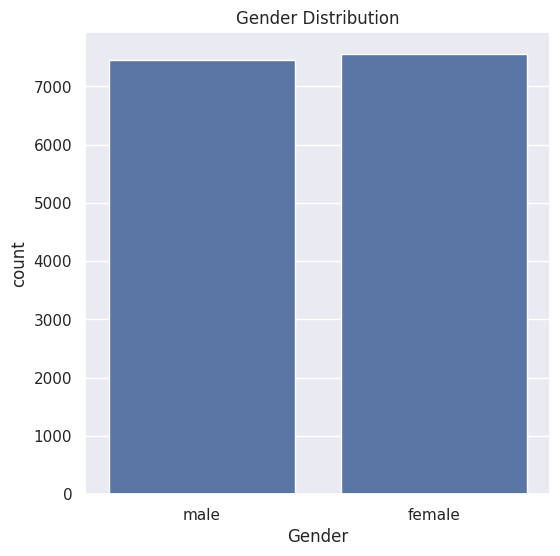

In [17]:
# Distribution Vertical Count Plot graph of Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='Gender', data=calories_burnt_data)
plt.title("Gender Distribution")
plt.show()

<ipython-input-18-a9721c85b7c2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_burnt_data["Age"])


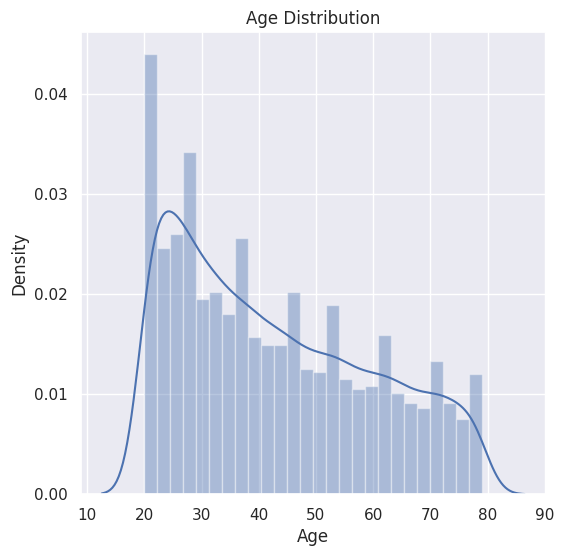

In [18]:
# Distribution graph of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(calories_burnt_data["Age"])
plt.title("Age Distribution")
plt.show()

<ipython-input-19-54bde2d24ef8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_burnt_data["Height"])


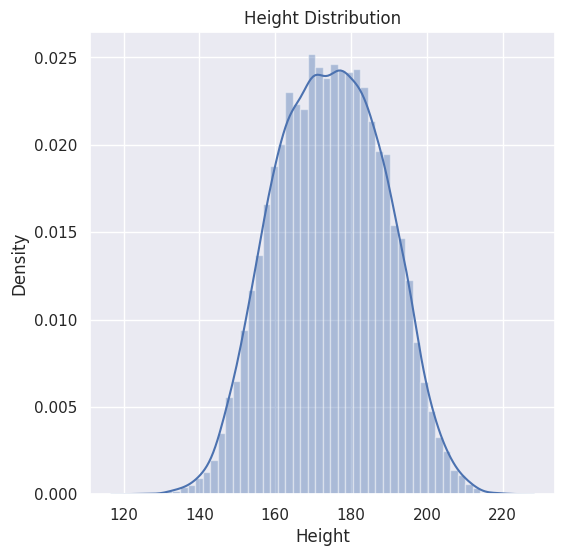

In [19]:
# Distribution graph of Height value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(calories_burnt_data["Height"])
plt.title("Height Distribution")
plt.show()

<ipython-input-20-a2d57d3dda8f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_burnt_data["Weight"])


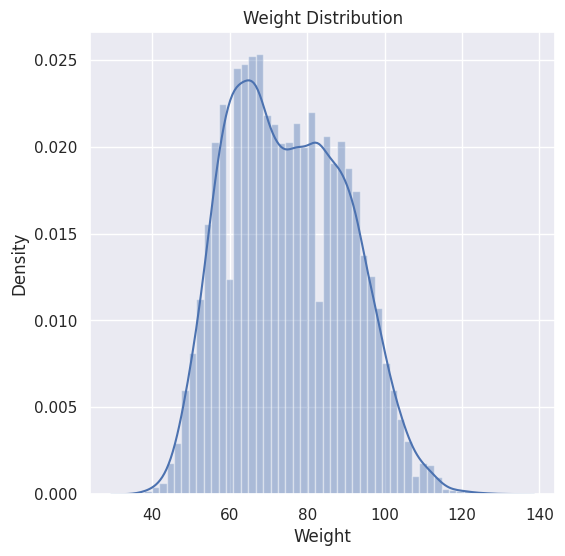

In [20]:
# Distribution graph of Weight value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(calories_burnt_data["Weight"])
plt.title("Weight Distribution")
plt.show()

<ipython-input-21-997daa7b58cd>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_burnt_data["Duration"])


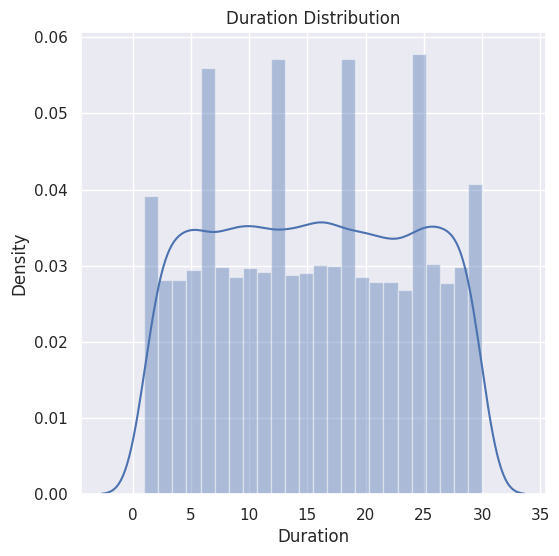

In [21]:
# Distribution graph of Duration value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(calories_burnt_data["Duration"])
plt.title("Duration Distribution")
plt.show()

#**Correlation of the datasets**

In [22]:
# Convert 'Gender' column to numerical representation using one-hot encoding
calories_burnt_dummies_data = pd.get_dummies(calories_burnt_data, columns=['Gender'], drop_first=True)

# Calculate the correlation matrix
corr = calories_burnt_dummies_data.corr()

# Print the correlation matrix
print(corr)

              User_ID       Age    Height    Weight  Duration  Heart_Rate  \
User_ID      1.000000 -0.001827 -0.013520 -0.011603 -0.002751   -0.000457   
Age         -0.001827  1.000000  0.009554  0.090094  0.013247    0.010482   
Height      -0.013520  0.009554  1.000000  0.958451 -0.004625    0.000528   
Weight      -0.011603  0.090094  0.958451  1.000000 -0.001884    0.004311   
Duration    -0.002751  0.013247 -0.004625 -0.001884  1.000000    0.852869   
Heart_Rate  -0.000457  0.010482  0.000528  0.004311  0.852869    1.000000   
Body_Temp    0.000923  0.013175  0.001200  0.004095  0.903167    0.771529   
Calories    -0.001661  0.154395  0.017537  0.035481  0.955421    0.897882   
Gender_male -0.000687  0.003222  0.710534  0.783186  0.003440    0.011555   

             Body_Temp  Calories  Gender_male  
User_ID       0.000923 -0.001661    -0.000687  
Age           0.013175  0.154395     0.003222  
Height        0.001200  0.017537     0.710534  
Weight        0.004095  0.035481     

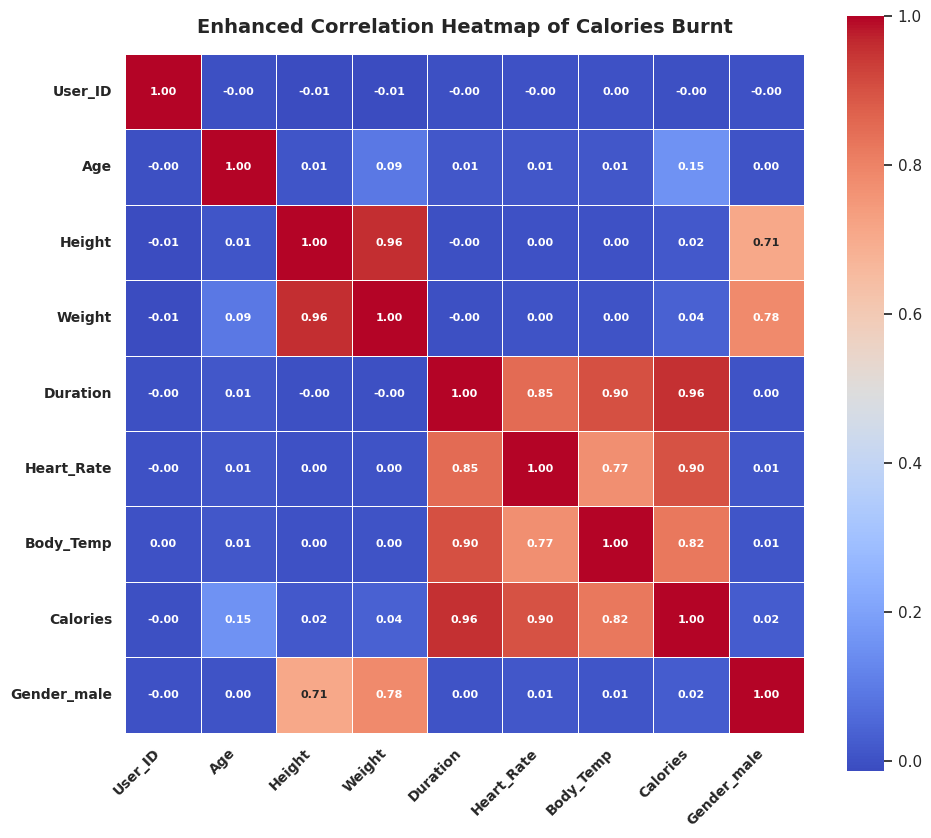

In [23]:
# Create the heatmap with enhancements
plt.figure(figsize=(10, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    square=True,
    annot_kws={"size": 8, "weight": "bold"},
)
plt.title("Enhanced Correlation Heatmap of Calories Burnt", fontsize=14, fontweight="bold", pad=15)
plt.xticks(fontsize=10, rotation=45, ha="right", weight="bold")
plt.yticks(fontsize=10, weight="bold")
plt.tight_layout()

#**Data Preprocessing**


**Encoding the Categorical column**

In [24]:
# Converting the text data into numerical values
calories_burnt_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

<ipython-input-24-79d33b9a6354>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_burnt_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)


In [25]:
# Display the first few rows
print("First 5 rows of the dataset:")
calories_burnt_data.head()

First 5 rows of the dataset:


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


**Splitting the dataset into Features & Target**

In [26]:
# Splitting the dataset into Dependents & Independent
X = calories_burnt_data.drop(columns=['User_ID','Calories'], axis=1)
y = calories_burnt_data['Calories']

In [27]:
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0       0   68   190.0    94.0      29.0       105.0       40.8
1       1   20   166.0    60.0      14.0        94.0       40.3
2       0   69   179.0    79.0       5.0        88.0       38.7
3       1   34   179.0    71.0      13.0       100.0       40.5
4       1   27   154.0    58.0      10.0        81.0       39.8

Target (y):
0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64


# **Splitting the dataset into Training and Test sets**

In [28]:
# Splitting the dataset into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=3)
print("\nDataset split completed:")
print(f"Total samples: {X.shape[0]}, Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Dataset split completed:
Total samples: 15000, Training samples: 12750, Test samples: 2250


In [29]:
# checking the number of Test and Train dataset
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12750, 7) (2250, 7)


# **Model Training**

In [30]:
# Initialize the model
model = XGBRegressor()

In [31]:
# Training the XGBRegressor model with train data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#**Model Evaluation**

In [32]:
# Evaluate on Training Data
training_data_prediction = model.predict(X_train)
r2_train = metrics.r2_score(y_train, training_data_prediction)
mae_train = metrics.mean_absolute_error(y_train, training_data_prediction)
print(f"\nTraining Data Evaluation:\nR-squared Error: {r2_train:.4f}\nMean Absolute Error: {mae_train:.4f}")



Training Data Evaluation:
R-squared Error: 0.9996
Mean Absolute Error: 0.9606


In [33]:
# Evaluate on Test Data
test_data_prediction = model.predict(X_test)
r2_test = metrics.r2_score(y_test, test_data_prediction)
mae_test = metrics.mean_absolute_error(y_test, test_data_prediction)
print(f"\nTest Data Evaluation:\nR-squared Error: {r2_test:.4f}\nMean Absolute Error: {mae_test:.4f}")



Test Data Evaluation:
R-squared Error: 0.9988
Mean Absolute Error: 1.4350
